# Rectangular interior

Based on https://github.com/lzhw1991/AcousticBEM/blob/master/Jupyter/Rectangular%20Interior%20Helmholtz%20Problems.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ohbemn import wave, Solver, Region

elements: 128


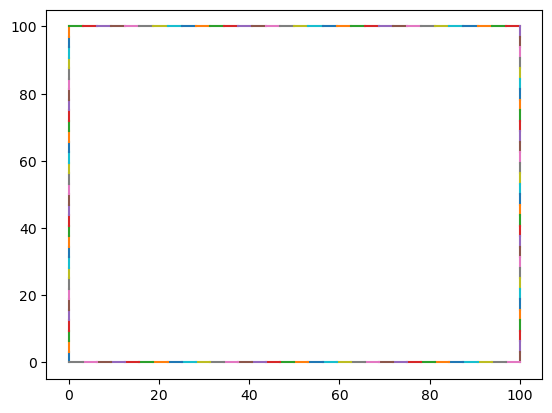

In [26]:
f = 1/5. # [Hz]
T = 1/f
d = 40.  # [m]
c, cg, k = wave.wavec_interm(T, d)

region = Region.rectangle(100, 100, 32, 32)

f, ax = plt.subplots()
region.plot(ax)

print("elements:", region.len())

In [28]:
# Specifying boundary conditions

bc = region.boundary_condition()
bc.alpha.fill(1.0)
bc.beta.fill(1.0)
bc.f.fill(0.5j)
bc.f[0:(2*32)].fill(1.0)
# self.boundaryCondition.f[ 0] = 1.0
# self.boundaryCondition.f[-1] = 1.0

# definition of incident fields on boundary

bi = region.boundary_incidence()
bi.phi.fill(0.0) # no incoming velocity potential on boundary                                              
bi.v.fill(0.0)   # no incoming velocity on boundary 

In [29]:
# Interior grid where we want to know the field
xi = np.arange(0, 100, 3)
yi = np.arange(0, 100, 3)
xx, yy = np.meshgrid(xi, yi)
xx, yy = xx.ravel(), yy.ravel()

ip = np.vstack((xx, yy)).T
print("Interior points:", ip.shape[0])
i_incident = np.zeros(ip.shape[0])

Interior points: 1156


In [30]:
# Ready to solve!

solver = Solver(region)
boundary_solution = solver.solve_boundary('interior', k, c, bc, bi)

In [31]:
# Now we can solve the field at the interior points:

interior = boundary_solution.solve_samples(i_incident, ip)

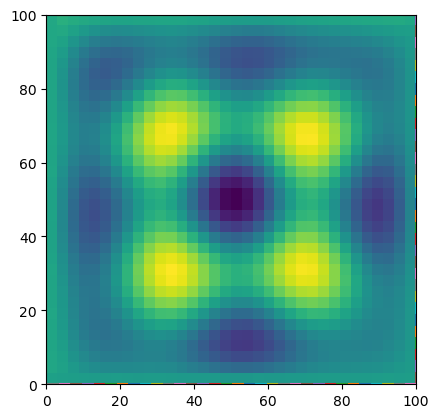

In [32]:
# And plot:

f, ax = plt.subplots()
region.plot(ax)

ax.imshow(interior.phis.reshape((len(xi), len(yi))).real, extent=[0, 100, 0, 100], origin='lower')